In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import shutil, os, time, datetime, re
import pandas as pd
from PIL import Image
from scraper import DataPreparation, Corpus
from analyzer import Analyzer

# Corpus Creation

In [2]:
cp = Corpus()

In [6]:
#cp.initCorpus()

# Data Preparation

In [22]:
dp = DataPreparation()

In [7]:
#dp.getImages()

In [23]:
data_dict = dp.createAnalyzerDict()

<DirEntry 'hausvonazer.de.html'>
<DirEntry 'houseofsolution.de.html'>
<DirEntry 'INFO.txt'>
<DirEntry 'pierrevogelde.blogspot.com.html'>
<DirEntry 'tabgha.ruhr.html'>
<DirEntry 'www.al-adala.de.html'>
<DirEntry 'www.buddhismus-deutschland.de.html'>
<DirEntry 'www.credo-kirche.de.html'>
<DirEntry 'www.ditib.de.html'>
<DirEntry 'www.ekd.de.html'>
<DirEntry 'www.gebetshaus.org.html'>
<DirEntry 'www.hinduistische-gemeinde-deutschland.de.html'>
<DirEntry 'www.katholisch.de.html'>
<DirEntry 'www.kircheimpott.de.html'>
<DirEntry 'www.miraath.de.html'>
<DirEntry 'www.zentralratderjuden.de.html'>
<DirEntry 'zentralrat.de.html'>
Current netloc hausvonazer.de of type <class 'str'>
Current netloc houseofsolution.de of type <class 'str'>
Current netloc pierrevogelde.blogspot.com of type <class 'str'>
Current netloc tabgha.ruhr of type <class 'str'>
Current netloc al-adala.de of type <class 'str'>
Current netloc buddhismus-deutschland.de of type <class 'str'>
Current netloc credo-kirche.de of type <

In [25]:
data_dict["gebetshaus.org"]

{'total_images': 10,
 'big_images': 3,
 'middle_images': 0,
 'small_images': 2,
 'background_images': 5,
 'images': {'https://www.facebook.com/tr?id=351653355242095&ev=PageView &noscript=1': {'width': 1,
   'height': 1},
  'gebetshaus-logo-white.svg': {'width': -1, 'height': -1},
  'fileadmin/_processed_/1/4/csm_Willkommen_im_Gebetshaus-1_d0d2e857a7.jpg': {'width': 1024,
   'height': 683},
  'fileadmin/home/gebetshaus-slide-1-1024x638.jpg': {'width': 1024,
   'height': 637},
  'fileadmin/_processed_/a/3/csm_Willkommen_im_Gebetshaus-3_941ada6cd3.jpg': {'width': 1024,
   'height': 683},
  'fileadmin/home/Unterstuetzen.png': {'width': -1, 'height': -1},
  'fileadmin/home/Mitarbeiten.png': {'width': -1, 'height': -1},
  'fileadmin/home/Besuchen.png': {'width': -1, 'height': -1},
  'https://www.paypal.com/de_DE/i/scr/pixel.gif': {'width': 1, 'height': 1},
  'typo3conf/ext/yt_gebetshaus/Resources/Public/Images/scroll-top.png': {'width': -1,
   'height': -1}},
 'total_length': 41724,
 'text_c

# Analysis

In [2]:
ana = Analyzer()

In [3]:
# Clustering & Standardization

In [6]:
df_orig = ana.data_df

In [19]:
df_orig_clustered = ana.clusterData(df_orig[["big_images", "total_length"]])

In [20]:
df_orig_clustered

,big_images,total_length,clusters
hausvonazer.de,14,875,0
houseofsolution.de,1,4192,0
pierrevogelde.blogspot.com,0,6277,0
tabgha.ruhr,8,2707,0
al-adala.de,0,11270,0
buddhismus-deutschland.de,16,7405,0
credo-kirche.de,0,1848,0
ditib.de,0,4243,0
ekd.de,8,24499,1
gebetshaus.org,3,41724,2


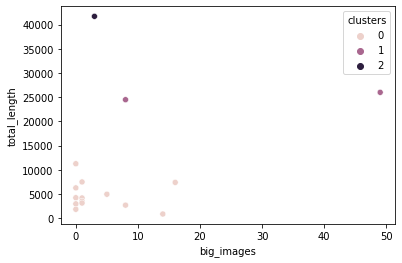

In [21]:
ana.visualizeCluster(df_orig_clustered, "big_images", "total_length")

In [11]:
df_scaled = ana.standardizeData(df_orig)

In [12]:
df_scaled_clustered = ana.clusterData(df_scaled)

In [13]:
df_scaled_clustered

,total_images_scaled,big_images_scaled,middle_images_scaled,small_images_scaled,background_images_scaled,total_length_scaled,external_links_scaled,internal_links_scaled,total_links_scaled,clusters
hausvonazer.de,-0.326248,0.609449,0.417883,-0.741087,-0.383104,-0.791339,-0.438083,-0.801780,-0.846838,0
houseofsolution.de,-0.356076,-0.474016,-0.537278,0.343903,-0.269592,-0.489500,-0.267124,0.248460,0.191975,0
pierrevogelde.blogspot.com,0.389633,-0.557360,0.417883,0.653901,-0.383104,-0.299769,1.186030,0.178444,0.378812,0
tabgha.ruhr,0.329976,0.109388,-0.728310,0.188905,-0.383104,-0.624632,-0.438083,-0.786221,-0.831891,0
al-adala.de,-0.475390,-0.557360,1.564075,-0.663588,-0.383104,0.154582,-0.694522,2.061096,1.858559,0
buddhismus-deutschland.de,-0.296420,0.776136,-0.728310,-0.741087,-0.383104,-0.197124,-0.908221,-0.755103,-0.884205,0
credo-kirche.de,-0.743845,-0.557360,-0.728310,-0.353591,-0.269592,-0.702799,-0.694522,-0.887356,-0.973887,0
ditib.de,-0.027964,-0.557360,0.799947,0.111405,-0.383104,-0.484859,-0.438083,-0.226093,-0.293801,0
ekd.de,3.491785,0.109388,2.519235,3.443877,3.703339,1.358392,-0.309864,2.527869,2.374228,1
gebetshaus.org,-0.654360,-0.307329,-0.728310,-0.663588,0.184457,2.925829,-0.181644,0.123987,0.087346,0


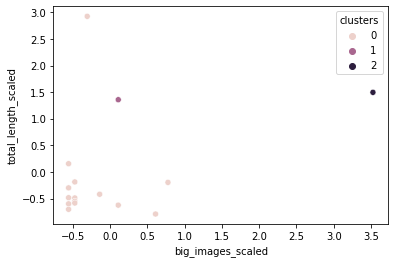

In [15]:
ana.visualizeCluster(df_scaled_clustered, "big_images_scaled", "total_length_scaled")

In [27]:
with open("CorpusData/www.gebetshaus.org.html", "r", encoding="utf-8") as f:
    doc = f.read()

In [29]:
soup = BeautifulSoup(doc, "html.parser")

In [32]:
bk_imgs = soup.find_all(style=re.compile("background-image"))

In [54]:
for img in bk_imgs:
    print(img["style"])
    match = re.search(r"url\((.*?)\)", img["style"])
    print(match.group(1))
    url = re.sub(r"[\"']+", "", match.group(1).strip())
    print(url)

background-image: url("fileadmin/_processed_/e/7/csm_Startseite_-_Sebastian_-_DSC00145_080105ecf4.jpg"); opacity: 1; transform: scale(1);
"fileadmin/_processed_/e/7/csm_Startseite_-_Sebastian_-_DSC00145_080105ecf4.jpg"
fileadmin/_processed_/e/7/csm_Startseite_-_Sebastian_-_DSC00145_080105ecf4.jpg
background-image: url('fileadmin/Oktober2020-2.jpg')
'fileadmin/Oktober2020-2.jpg'
fileadmin/Oktober2020-2.jpg
background-image: url('fileadmin/IMG_2759.JPG')
'fileadmin/IMG_2759.JPG'
fileadmin/IMG_2759.JPG
background-image: url('fileadmin/1000_Dank_-_1500x1500_-_Cover_Mockup.jpg')
'fileadmin/1000_Dank_-_1500x1500_-_Cover_Mockup.jpg'
fileadmin/1000_Dank_-_1500x1500_-_Cover_Mockup.jpg
background-image: url('fileadmin/home/Termine.jpg')
'fileadmin/home/Termine.jpg'
fileadmin/home/Termine.jpg


In [55]:
list1 = [1,2,3]
list2 = [3,4,5]

In [56]:
list1 + list2

[1, 2, 3, 3, 4, 5]